# **TUGAS PRAKTIKUM | WEEK 5 | NARESH PRATISTA**

## **1. Buat Gamma Correction**

In [1]:
# Import Library

import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import numpy as np

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


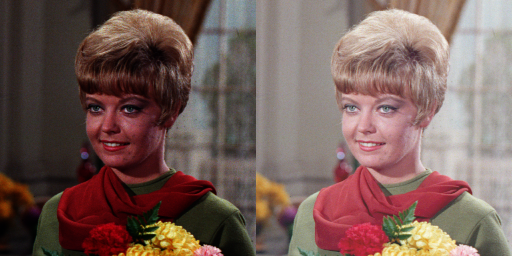

In [7]:

import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/female.tiff", cv2.IMREAD_COLOR)

def adjust_gamma(image, gamma):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

img_gamma = adjust_gamma(img, gamma)

# Concatenate the original and gamma-corrected images side by side
combined_image = np.hstack((img, img_gamma))

cv2_imshow(combined_image)

## **2. Buat Simulasi Image Depth**

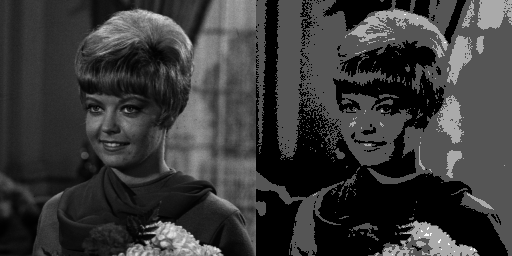

In [9]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/female.tiff', cv2.IMREAD_GRAYSCALE)
depth_image = np.round(original/level) * level

combined_image2 = np.hstack((original, depth_image))

cv2_imshow(combined_image2)

## **3. Buat modul Average Denoising**

In [12]:
import glob

original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/galaxy.jpg')

arr_image = []
jumlah_citra = [5, 10, 20, 40, 80, 100]

for _ in range(len(jumlah_citra)):
    arr_image.append(np.zeros(original.shape, original.dtype))

# Menyimpan 100 image yang telah diberi gaussian noise pada sebuah variabel menggunakan library glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/noises/*.jpg'):
  n=cv2.imread(img)
  cv_img.append(n)
# Fungsi untuk menghitung nilai PSNR dengan membandingkan 2 gambar
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

# Menghitung average citra
for citra in range(len(jumlah_citra)):
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            for c in range(original.shape[2]):
                jumlah = 0
                average = 0
                for n in range(min(jumlah_citra[citra], len(cv_img))):
                    # Resize the noisy image to match the dimensions of the original
                    resized_noisy_image = cv2.resize(cv_img[n], (original.shape[1], original.shape[0]))
                    jumlah += resized_noisy_image[i, j, c]
                average = float(jumlah / min(jumlah_citra[citra], len(cv_img)))
                arr_image[citra][i, j, c] = average

for i in range(len(jumlah_citra)):
  print("Average ", jumlah_citra[i])
  print("PSNR: ", PSNR(original, arr_image[i]))
  cv2_imshow(arr_image[i])
  print("\n")

KeyboardInterrupt: ignored

## **4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP)**

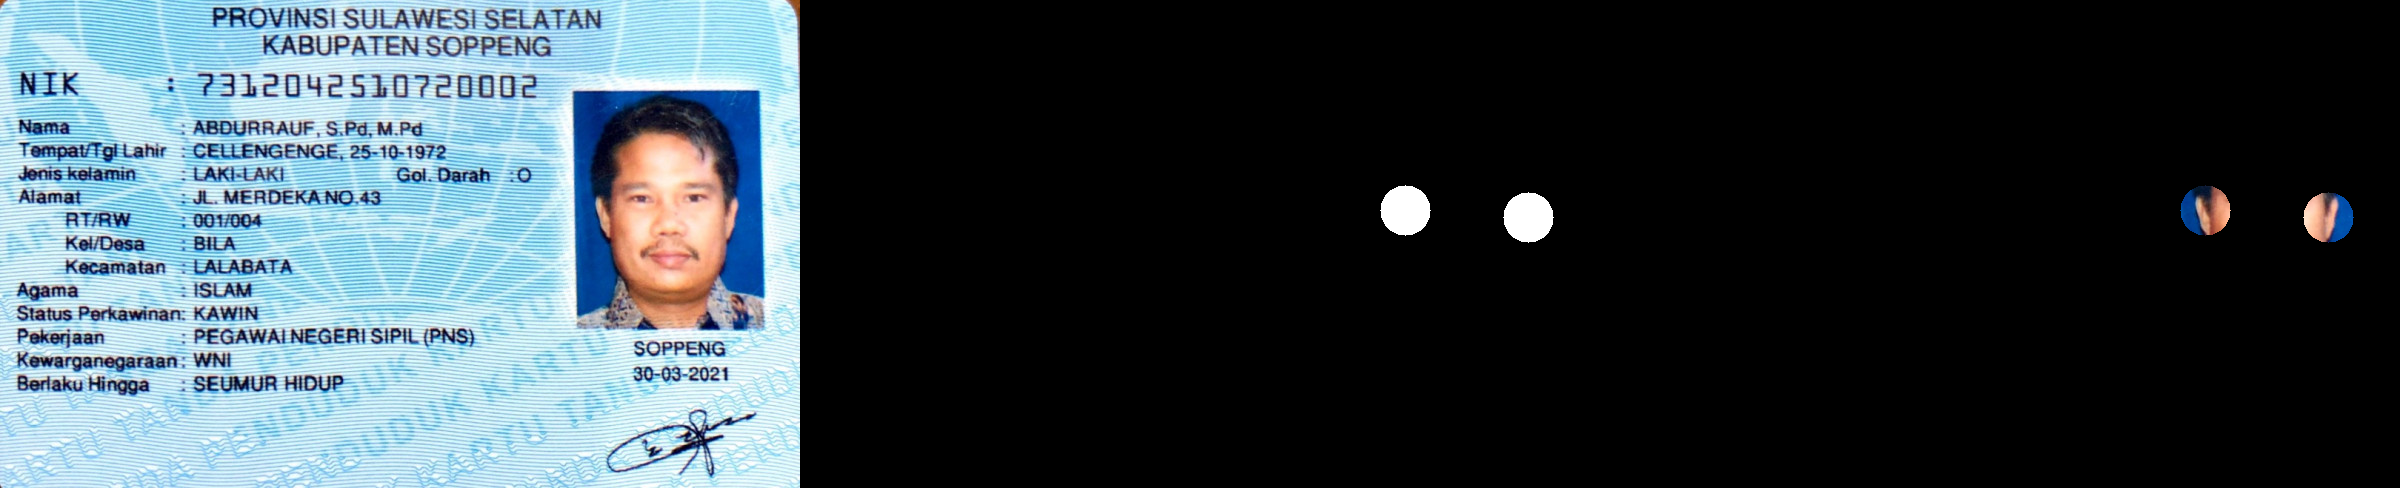

In [14]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ktp.jpg')

center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

mask = np.zeros(original_image.shape, dtype=np.uint8)
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background
masked = original_image & mask

result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

## **5. Operasi Image**

NOT

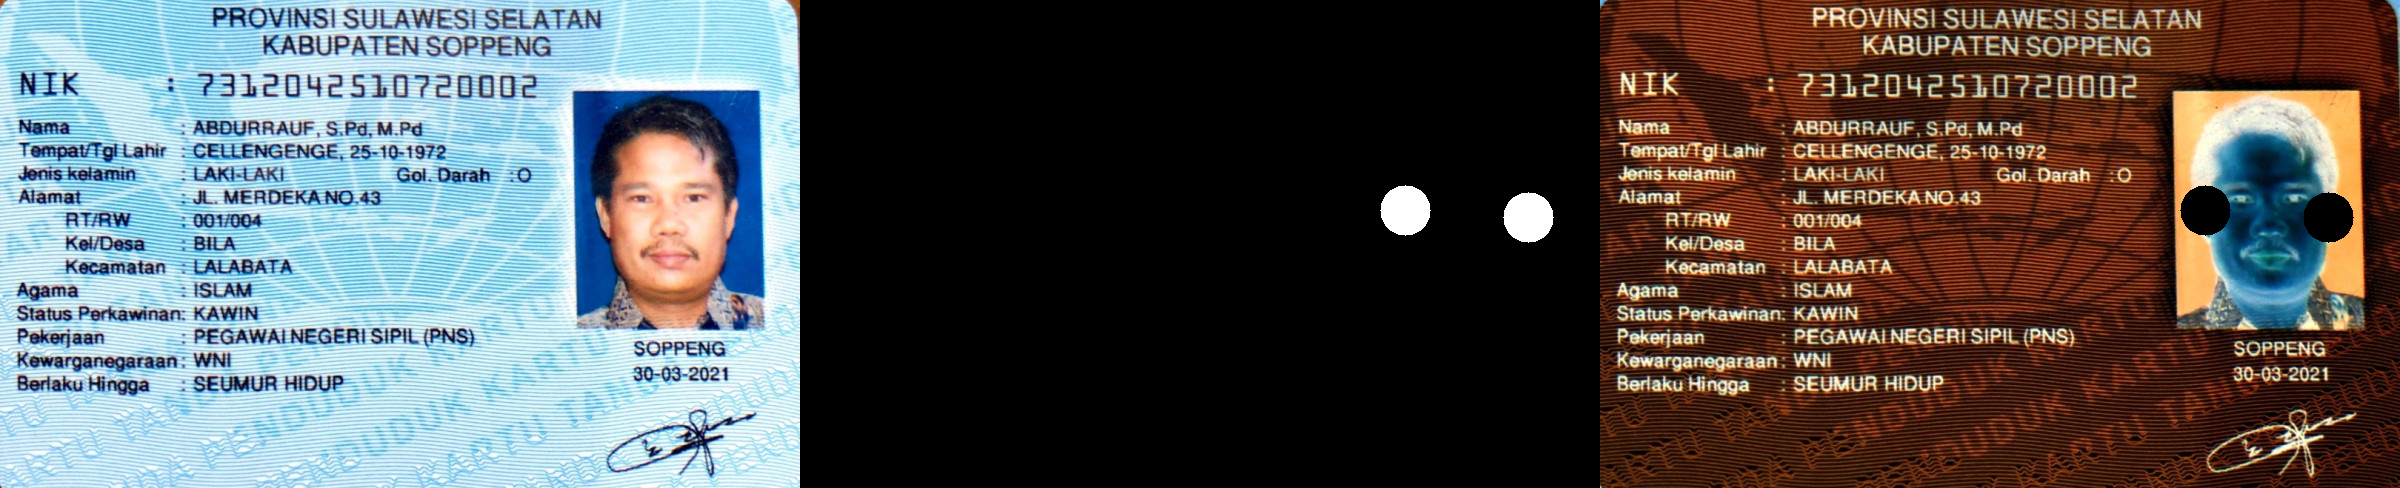

In [15]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ktp.jpg')

center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

mask = np.zeros(original_image.shape, dtype=np.uint8)
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background
masked = ~original_image & ~mask

result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

OR

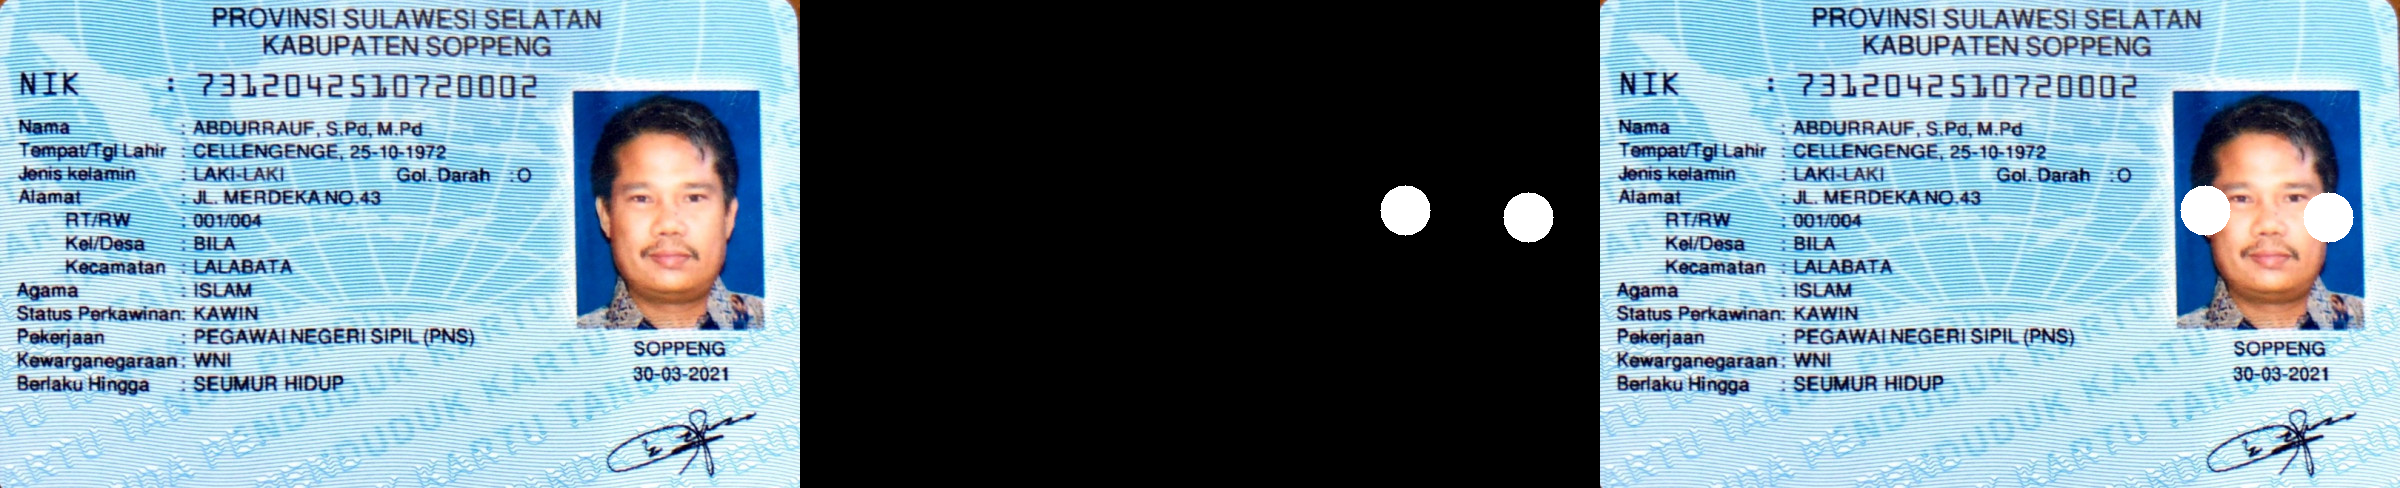

In [17]:
import cv2
import numpy as np

original_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ktp.jpg')

center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

mask = np.zeros(original_image.shape, dtype=np.uint8)

cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background
masked = cv2.bitwise_or(original_image, mask)

result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

AND

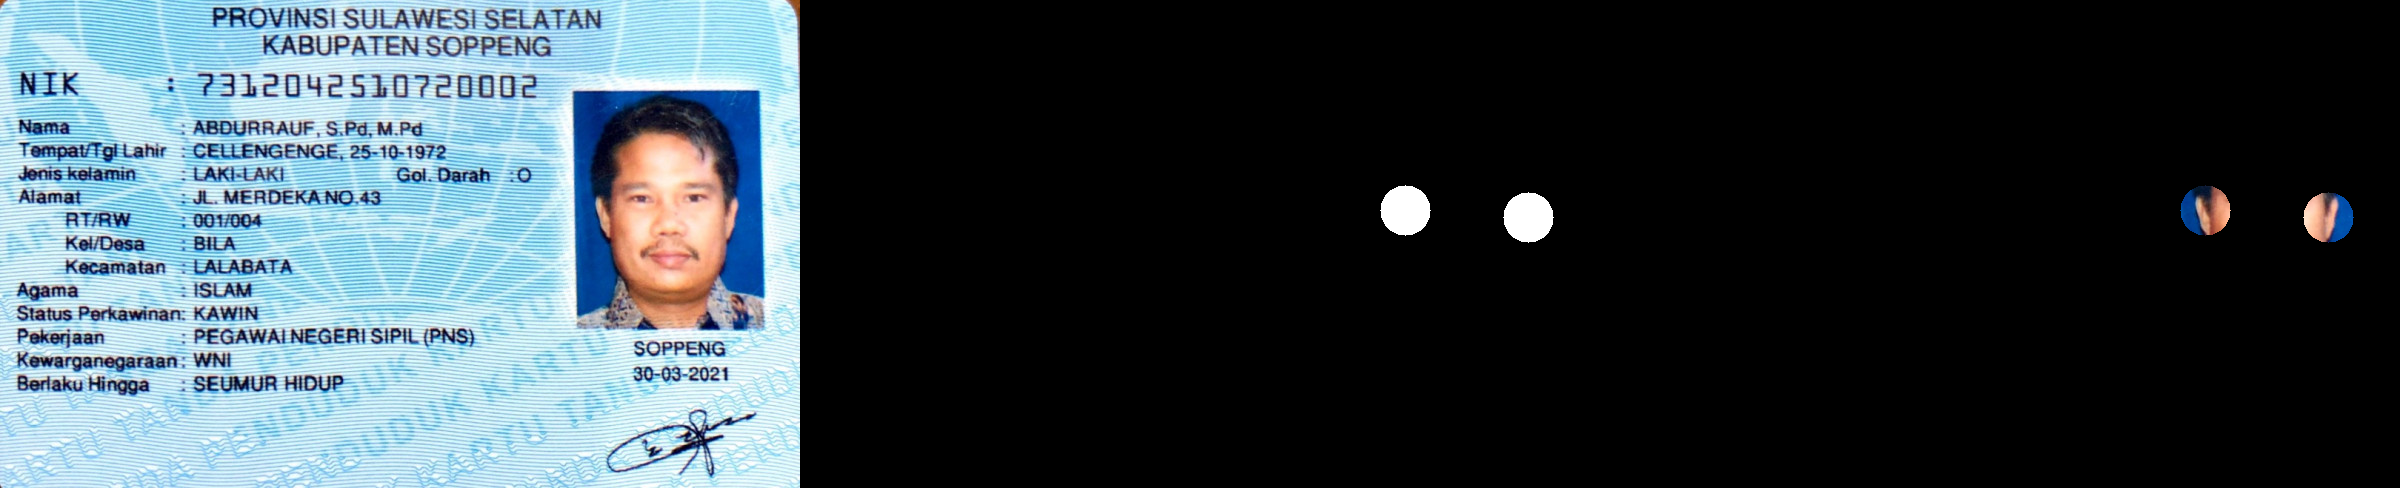

In [19]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ktp.jpg')

center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

mask = np.zeros(original_image.shape, dtype=np.uint8)

cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background
masked = cv2.bitwise_and(original_image, mask)

result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

NAND

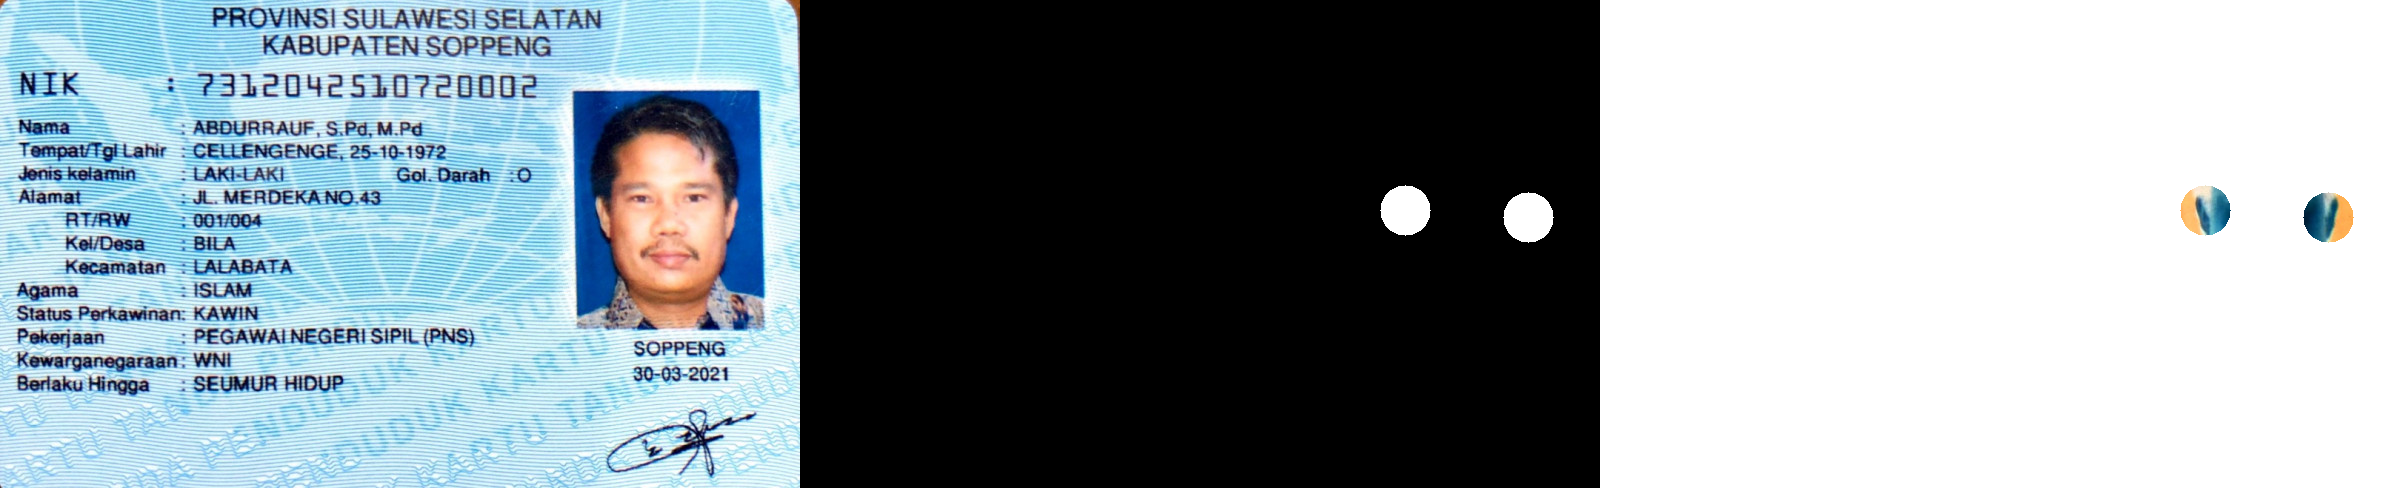

In [20]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ktp.jpg')

center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

mask = np.zeros(original_image.shape, dtype=np.uint8)

cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background
masked = cv2.bitwise_not(cv2.bitwise_and(original_image, mask))

result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

XOR

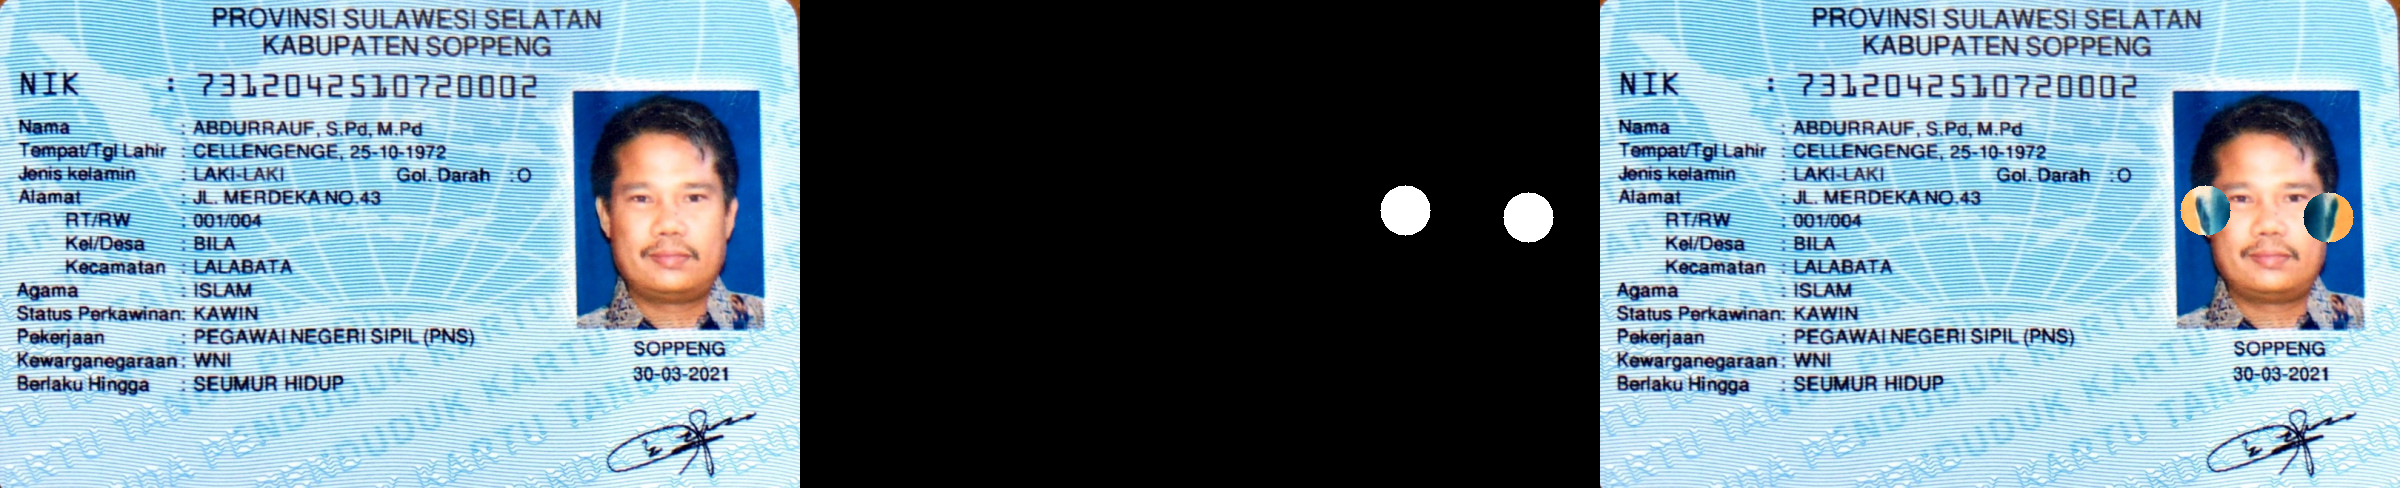

In [21]:
import cv2
import numpy as np

original_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ktp.jpg')

center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

mask = np.zeros(original_image.shape, dtype=np.uint8)

cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background
masked = cv2.bitwise_xor(original_image, mask)

result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)